In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
#grab data generated by data ingestion file
file_path = '/content/drive/MyDrive/Columbia/Classes/3_Junior_Year/Spring_Sem/Applied_Machine_Learning/Projects/Project_2/processed_tweets.csv'

raw_df = None

for encoding in ['latin1', 'ISO-8859-1', 'cp1252']:
    try:
        raw_df = pd.read_csv(file_path, encoding=encoding)
        print(f"Success with {encoding}")
        break
    except Exception as e:
        print(f"Failed with {encoding}: {e}")

if raw_df is None:
    raise ValueError("❌ All encoding attempts failed. Please check the file or try a different encoding.")

print(raw_df.head())

Success with latin1
       target          id                 date      flag           user  \
0  1970-01-01  1467810672  2009-04-06 22:19:49  NO_QUERY  scotthamilton   
1  1970-01-01  1467810917  2009-04-06 22:19:53  NO_QUERY       mattycus   
2  1970-01-01  1467811184  2009-04-06 22:19:57  NO_QUERY        ElleCTF   
3  1970-01-01  1467811193  2009-04-06 22:19:57  NO_QUERY         Karoli   
4  1970-01-01  1467811372  2009-04-06 22:20:00  NO_QUERY       joy_wolf   

                                                text  
0  is upset that he can't update his Facebook by ...  
1  @Kenichan I dived many times for the ball. Man...  
2    my whole body feels itchy and like its on fire   
3  @nationwideclass no, it's not behaving at all....  
4                      @Kwesidei not the whole crew   


In [ ]:
#validation set 2: easiest, best case scenario data <-- MAKING SURE ARCHITECTURE WORKS IN THEORY

#topic: politics:

#(ideal) cluster 1: criticism of republicans

cluster_1 = [
    "The GOP's idea of 'family values' is banning books and ignoring healthcare. This isn’t politics—it’s regression.",
    "Politics under Republican leadership is like watching a train wreck in slow motion.",
    "Hard to believe we still have folks defending the GOP after everything. Politics is broken because of them.",
    "Republicans using fear and culture wars instead of facts—this is the politics they champion?",
    "Honestly, Republican politics today just feels like a bad joke with real-world consequences.",
    "If your politics revolve around removing rights instead of expanding them, maybe rethink your platform.",
    "Watching GOP politics is like stepping into a time machine set for 1950.",
    "It’s exhausting how Republican politics prioritizes party over people—always.",
    "Politics isn’t a game, but the GOP treats it like one. And we all lose.",
    "The politics of obstruction, fear, and denial—that’s the modern Republican brand.",
    "Republican politics thrives on outrage and division. That’s not leadership.",
    "Calling it: the GOP’s politics are about power, not policy.",
    "How is it 2025 and Republican politics is still denying climate change?",
    "The Republican stance on reproductive rights is not politics—it’s control.",
    "Can we stop pretending GOP politics cares about the working class?",
    "From book bans to anti-trans bills, Republican politics is a dystopian fever dream.",
    "Republicans use 'freedom' as a cover for bigotry. That’s not politics I can support.",
    "Every scandal gets buried because Republican politics rewards shamelessness.",
    "Conservative politics today seems allergic to nuance and allergic to truth.",
    "Republican politics: performative patriotism with zero accountability."
]

#(ideal) cluster 2: criticism of democrats

cluster_2 = [
    "Democratic politics is like watching a hamster wheel—lots of motion, no distance covered.",
    "Tired of the Dems playing nice when the other side is playing dirty. Politics isn’t recess.",
    "Politics under the Democrats feels like compromise for the sake of headlines.",
    "It’s wild how progressive promises vanish post-election. Classic Democratic politics.",
    "The Democrats fumble every bag. Like clockwork. Politics shouldn't be this predictable.",
    "If the Dems spent less time tweeting and more time legislating, politics might work better.",
    "I voted blue. I didn’t vote for vibes. Where’s the follow-through in politics?",
    "Centrist politics has gutted any momentum the left had. Thanks, Democrats.",
    "Democrats talk a big game about climate, healthcare, rights... but politics is results, not talk.",
    "The way Dems try to appeal to everyone ends up pleasing no one. What even is this politics?",
    "Politics is supposed to be bold. The Democrats keep tiptoeing around the real issues.",
    "I can’t tell if Democratic politics is incompetence or cowardice at this point.",
    "The politics of delay and deferment: a Democratic specialty.",
    "Dems get a mandate and then govern like they lost. What kind of politics is that?",
    "Every political cycle: big promises, then 'we tried, sorry.' That’s Democratic politics.",
    "Honestly, if I hear 'we’re doing our best' one more time from a Dem politician, I’ll scream. This is politics?",
    "Politics is frustrating when even the ‘good guys’ lack urgency.",
    "The Democrats keep proving that politics isn’t about ideals—it’s about inertia.",
    "Politics shouldn’t be afraid of bold change. Dems seem terrified of rocking the boat.",
    "I want politics that moves us forward. Dems keep offering gentle nudges."
]

#(ideal) cluster 3: anxiety about ukraine

cluster_3 = [
    "I can’t focus on anything else—politics is playing chess while Ukrainians bury their dead.",
    "Watching the news from Ukraine is gutting. Politics seems so small next to this human cost.",
    "Politics is dragging its feet while Ukraine runs out of time and hope.",
    "No ceasefire. No end in sight. Just more political statements. This is politics?",
    "There’s something profoundly broken in our politics if war like this can drag on with no urgency.",
    "We send billions and still can’t offer a clear plan. What kind of politics is this?",
    "My feed is full of Ukraine devastation while politicians debate talking points. That’s politics now?",
    "All the politics in the world, and not one real roadmap for Ukrainian peace.",
    "Is anyone in power even listening? Politics feels like noise while people in Ukraine are dying.",
    "Every meeting, every summit, and still no safety. What does politics even solve anymore?",
    "Ukraine has shown resilience. Politics, meanwhile, has shown apathy.",
    "It’s painful how normalized this war has become. Politics moves on. Families don’t.",
    "I’m haunted by the gap between political rhetoric and actual help for Ukraine.",
    "Political theater doesn’t rebuild cities. It doesn’t replace lives.",
    "We act like we’ve done enough. But if politics had truly worked, the bombs wouldn’t still be falling.",
    "The world watches. Leaders talk. And still, Ukraine bleeds. Politics isn’t enough.",
    "Another day, another tragedy in Ukraine, and our politics keeps spinning its wheels.",
    "When did politics become so cold to human suffering?",
    "Ukrainians don’t need speeches. They need the kind of politics that acts.",
    "It’s terrifying to realize how little politics can do once the missiles start falling."
]

#aggregate
fake_data_2 = cluster_1 + cluster_2 + cluster_3

print(fake_data_2)

["The GOP's idea of 'family values' is banning books and ignoring healthcare. This isn’t politics—it’s regression.", 'Politics under Republican leadership is like watching a train wreck in slow motion.', 'Hard to believe we still have folks defending the GOP after everything. Politics is broken because of them.', 'Republicans using fear and culture wars instead of facts—this is the politics they champion?', 'Honestly, Republican politics today just feels like a bad joke with real-world consequences.', 'If your politics revolve around removing rights instead of expanding them, maybe rethink your platform.', 'Watching GOP politics is like stepping into a time machine set for 1950.', 'It’s exhausting how Republican politics prioritizes party over people—always.', 'Politics isn’t a game, but the GOP treats it like one. And we all lose.', 'The politics of obstruction, fear, and denial—that’s the modern Republican brand.', 'Republican politics thrives on outrage and division. That’s not lead

In [ ]:
from openai import OpenAI

client = OpenAI(
  api_key="SCRUBBED"
)

completion = client.chat.completions.create(
  model="gpt-4o-mini",
  store=True,
  messages=[
    {"role": "user", "content": "write a haiku about ai"}
  ]
)

print(completion.choices[0].message);


ChatCompletionMessage(content='Silent circuits hum,  \nWisdom woven in the code,  \nDreams of thought take flight.', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None)


In [ ]:
#MAIN PROGRAM:
import pandas as pd
import numpy as np
from openai import OpenAI
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

client = OpenAI(api_key="SCRUBBED")

#GPT regex generator
def get_regex_prompt(topic):
    return f"""You're an expert in information retrieval. I want to search tweets about a topic using regular expressions.
Your task is to generate a comprehensive, case-insensitive regex that will match tweets about the following topic:

Topic: "{topic}"

Requirements:
- Make the regex flexible enough to match variations, plural forms, and common synonyms or abbreviations where applicable.
- Also, feel free to add other key terms, phrases, or tangentially related pre-/suffixes to the regex to help it match more tweets.
- Use standard Python regex formatting — do NOT escape backslashes. For example, use \\b not \\\\b.
- Only return the raw regex pattern. Example output: (?i)\b(politics|political|gov)\b
- Do not include explanations, quotes, or formatting. Just return the pattern.

Regex:"""

#Schema: average tweet from a group
def get_aggregate_tweet_prompt(tweets):
    joined = "\\n".join(f"- {tweet}" for tweet in tweets)
    return f"""You're a social media analyst. Here are 10 tweets about the same topic:

{joined}

Your task is to write a single short tweet (max 280 characters) that best captures the average sentiment, tone, and content of these tweets.

Only return the tweet text itself. Do not include explanations or commentary."""

#embed tweets in batches using GPT (use large model since batched)
def embed_tweets_batched(tweets, model="text-embedding-3-large", batch_size=1000):

    all_embeddings = []

    for i in range(0, len(tweets), batch_size):
        batch = tweets[i:i + batch_size]
        response = client.embeddings.create(input=batch, model=model)
        batch_embeddings = [r.embedding for r in response.data]
        all_embeddings.extend(batch_embeddings)

    return np.array(all_embeddings)

#plot elbow curve for user reference
def plot_elbow(embeddings, k_range=range(2, 50)):
    inertias = []
    for k in k_range:
        km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(embeddings)
        inertias.append(km.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(list(k_range), inertias, marker='o')
    plt.xlabel("k (number of clusters)")
    plt.ylabel("Inertia (within-cluster SSE)")
    plt.title("Elbow Method for Optimal k")
    plt.grid(True)
    plt.show()
    plt.pause(0.01)# <- this helps it render before moving on (doesn't skip next step)

#cluster embedding vectors
def cluster_vectors(embeddings, k):
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(embeddings)
    return km.labels_, km.cluster_centers_

# === Main demo function ===
def demo(df, text_column="text", budget_check=True):
    if budget_check:
        print("Reminder: OpenAI API budget is active. Each embedding call costs ~$0.000002/tweet.")

    topic = input("What topic would you like to explore? ").strip()

    regex_prompt = get_regex_prompt(topic)
    regex_response = client.chat.completions.create(
        model="gpt-3.5-turbo", #model choice
        messages=[{"role": "user", "content": regex_prompt}]
    )
    regex = regex_response.choices[0].message.content.strip()
    print(f"Using regex: {regex}")

    topic_df = df[df[text_column].str.contains(regex, regex=True, na=False)]
    topic_df = topic_df.reset_index(drop=True)
    if topic_df.empty:
        print("No tweets matched this regex. Try another topic.")
        return

    print(f"{len(topic_df)} tweets matched the topic.")
    tweets = topic_df[text_column].tolist()
    embeddings = embed_tweets_batched(tweets)

    plot_elbow(embeddings)
    print("here's the elbow plot!")
    k = int(input("Based on the elbow plot, choose a value for k: "))

    labels, centroids = cluster_vectors(embeddings, k)
    topic_df.loc[:, "cluster"] = labels

    for cluster_id in range(k):
        print(f"=== Cluster {cluster_id + 1} ===") #start counting at 1
        cluster_indices = topic_df[topic_df["cluster"] == cluster_id].index
        cluster_tweets = topic_df.loc[cluster_indices]
        cluster_vectors_arr = embeddings[cluster_indices]

        centroid = centroids[cluster_id]
        distances = [euclidean(vec, centroid) for vec in cluster_vectors_arr]
        min_idx = np.argmin(distances)
        closest_tweet = cluster_tweets.iloc[min_idx][text_column]
        closest_vec = cluster_vectors_arr[min_idx]
        cos_sim = cosine_similarity([centroid], [closest_vec])[0][0]

        print(f"Size: {len(cluster_tweets)} tweets")
        print(f'Closest tweet: "{closest_tweet}"')
        print(f"Euclidean dist: {distances[min_idx]:.4f}, Cosine sim: {cos_sim:.4f}")

        top_indices = np.argsort(distances)[:10]
        top_tweets = cluster_tweets.iloc[top_indices][text_column].tolist()
        summary_prompt = get_aggregate_tweet_prompt(top_tweets)

        gpt_summary = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": summary_prompt}]
        ).choices[0].message.content.strip()
        print(f"GPT summary: {gpt_summary}")
        #GPT summary to vector
        sum_vect = client.embeddings.create(input=[gpt_summary], model="text-embedding-3-large").data[0].embedding
        cos_sim_1 = cosine_similarity([centroid], [sum_vect])[0][0]
        cos_sim_2 = cosine_similarity([closest_vec], [sum_vect])[0][0]
        print(f"Cosine sim to centroid: {cos_sim_1:.4f}")
        print(f"Cosine sim to closest tweet: {cos_sim_2:.4f}")

        centroid_str = " ".join([f"{x:.4f}" for x in centroid]) #lim dim here
        centroid_prompt = f"The following is a vector embedding in semantic space. Try to guess what kind of tweet it represents:\\n\\n{centroid_str}\\n\\nReturn just the tweet."

        gpt_guess = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": centroid_prompt}]
        ).choices[0].message.content.strip()

        print(f"GPT guess from centroid: {gpt_guess}")
        print(" ")


Reminder: OpenAI API budget is active. Each embedding call costs ~$0.000002/tweet.
What topic would you like to explore? soccer
Using regex: (?i)\b(soccer|footy|football|futbol|soccerball|fútbol|soccer game|soccer match|soccer season|soccer team|soccer player)\b


<ipython-input-38-fc9bd6ef1a65>:88: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  topic_df = df[df[text_column].str.contains(regex, regex=True, na=False)]


2173 tweets matched the topic.


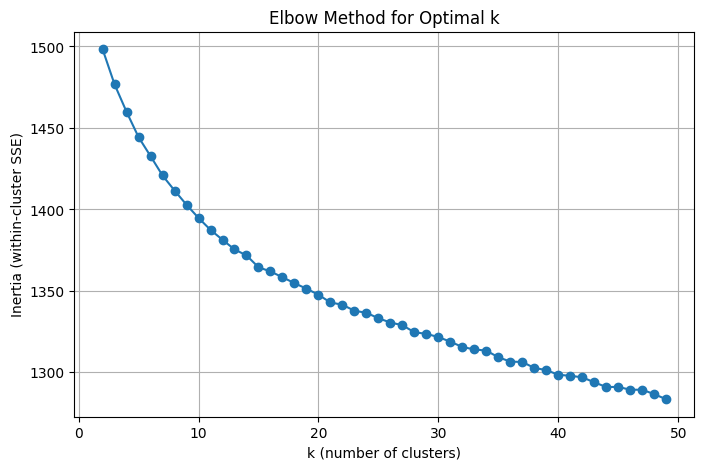

here's the elbow plot!
Based on the elbow plot, choose a value for k: 5
=== Cluster 1 ===
Size: 492 tweets
Closest tweet: "going to soccer  yeahhhh"
Euclidean dist: 0.6713, Cosine sim: 0.7576
GPT summary: Excited for a day filled with soccer games, practices, and bonding time with friends and family! ⚽️👟🌞 #soccerlife
Cosine sim to centroid: 0.7173
Cosine sim to closest tweet: 0.5355
GPT guess from centroid: In a world where you can be anything, be kind.
 
=== Cluster 2 ===
Size: 317 tweets
Closest tweet: "back from soccer lost 3-2 it sucked not being able 2 play "
Euclidean dist: 0.6634, Cosine sim: 0.7620
GPT summary: Feeling tired and sore after a soccer game, but still pushing through despite the losses. ⚽️ #soccerlife #perseverance
Cosine sim to centroid: 0.6621
Cosine sim to closest tweet: 0.4901
GPT guess from centroid: It seems that the data provided is an encoded tweet with vector embedding in semantic space. To decode it and return the original tweet, we need more information 

In [ ]:
df = pd.DataFrame(fake_data_2, columns=["text"])
demo(raw_df)